<p><img alt="UN logo" height="80px" src="https://unal.edu.co/typo3conf/ext/unal_skin_default/Resources/Public/images/escudoUnal_black.png" align="right" hspace="0px" vspace="0px"></p>

<H1 align="center">Laboratory 6</H1>
<h3 align="center">Andrés Felipe Jiménez Pérez</h3>
<h3 align="center">2016696 - Algorithms - Grupo 2</h3>
<h4 align="center">UNIVERSIDAD NACIONAL DE COLOMBIA</h4>
<h3 align="center">November 1, 2020</h3>

## Modification to plot a square in the complex palne with center in (z_c_r, z_c_i) and of size zw x zh 

Modfied from Fractals with Python - The Newton Set https://blog.anvetsu.com/posts/fractals-newton-python-matplotlib-numpy/
from the Fractals with Python series https://blog.anvetsu.com/tags/fractal/

German Hernandez

![picture](https://raw.githubusercontent.com/gjhernandezp/algorithms/master/Z3_1centermap.png)

## **$x^2$ and $z^2$**

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

#--- FUNCTION
def f(z):
    return z ** 2

def df(z):
    return 2 * z
#--- 

def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256, m=1):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

#--- ROOTS
    # Bounding roots
    r1 = 0
    r2 = 0
#---

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - m*f(z) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                elif abs(z-r2)<=eps:
                    # color green
                    pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                else:   
                   pixels[height-y-1,x] = (0, 0, 0)
               
    return pixels

def display1(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256, m=1):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter, m=m)    
    #--- Function
    plt.title('Newton Fractal f(z)=z^2') 
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()


### **1. Plot the function in a x range that include the vertex and the roots (if there are roots).**

Text(0, 0.5, 'f(x)')

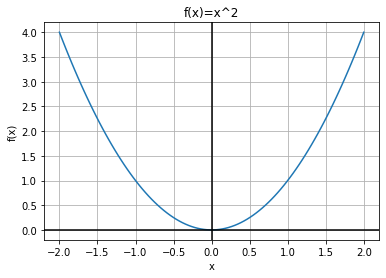

In [2]:
x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,f(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)=x^2') #--- Function
plt.xlabel('x')
plt.ylabel('f(x)')




### **2. Applying the Classic and Po Shen Loh ‘s methods for solving the quadratic equation.**

#### **Classic**
Solving:
$$x^2 = 0$$

From the equation we have

$$x = 0$$

$\square$

#### **Po Shen Loh's method**
Solving:

$$x^2 + 0x + 0 = 0$$

IF we can find two numbers with
$$sum = 0$$
$$product = 0$$
THEN they are all the solutions.

A pair of $0/2$ will give a sum of $0$.
Need $u$: $0 - u$, $0 + u$ give product
$$0 - u^2 = 0$$
$$u = 0$$

FINALLY $$x = 0$$
$\square$

### **3. Plot of the Newton fractals for the corresponding complex quadratic polynomial.**

zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


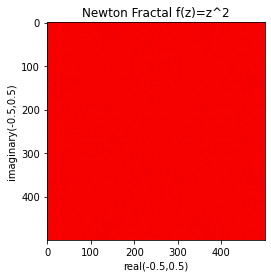

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


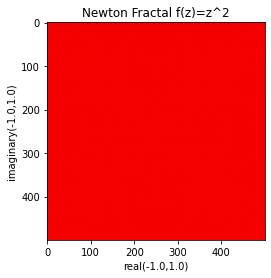

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


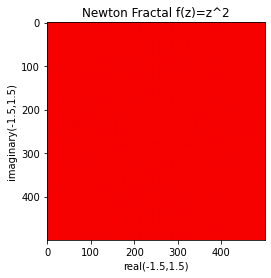

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


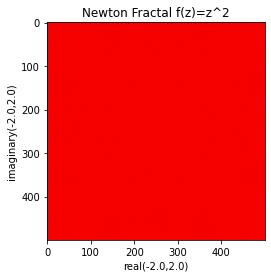

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


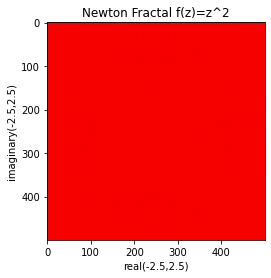

In [3]:
print("zoom out")
display1(zoom=1, m=2)
display1(zoom=2, m=2)
display1(zoom=3, m=2)
display1(zoom=4, m=2)
display1(zoom=5, m=2)

zoom in
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


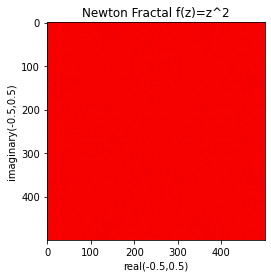

Z region from ( -0.25 , -0.25 ) to ( 0.25 , 0.25 )


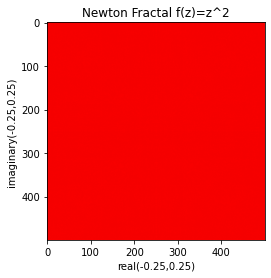

Z region from ( -0.16666666666666666 , -0.16666666666666666 ) to ( 0.16666666666666666 , 0.16666666666666666 )


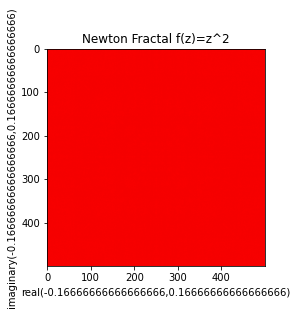

Z region from ( -0.125 , -0.125 ) to ( 0.125 , 0.125 )


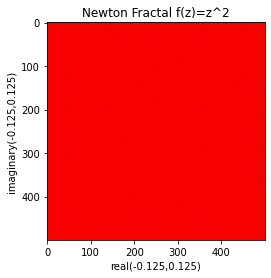

Z region from ( -0.1 , -0.1 ) to ( 0.1 , 0.1 )


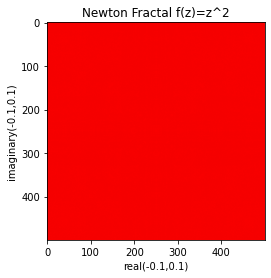

Z region from ( -0.05 , -0.05 ) to ( 0.05 , 0.05 )


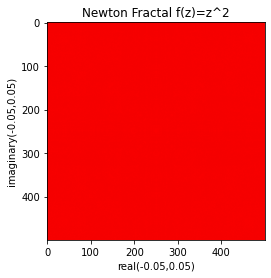

Z region from ( -0.005 , -0.005 ) to ( 0.005 , 0.005 )


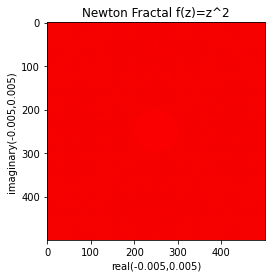

Z region from ( -0.0005 , -0.0005 ) to ( 0.0005 , 0.0005 )


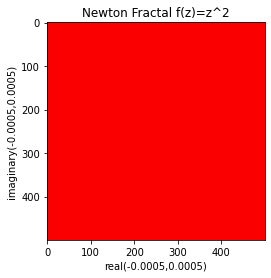

In [4]:
print("zoom in")
display1(zoom=1, m=2)
display1(zoom=1/2, m=2)
display1(zoom=1/3, m=2)
display1(zoom=1/4, m=2)
display1(zoom=1/5, m=2)
display1(zoom=1/10, m=2)
display1(zoom=1/100, m=2)
display1(zoom=1/1000, m=2)

### **4. Plot of the Newton's iterations for points on the positive and negative axes for the complex quadratic polynomial in 3. (Interpretation of the results at the end).**

### Newton's iteration form $z=10.0 + 0.0j$

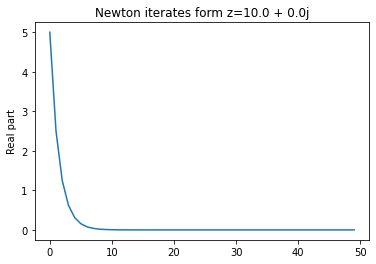

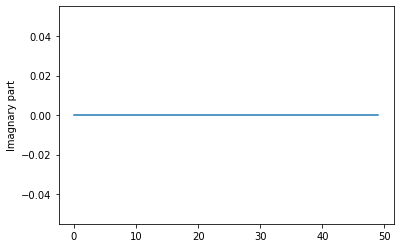

In [5]:
z=10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

### Newton's iteration form $z=-10.0 + 0.0j$

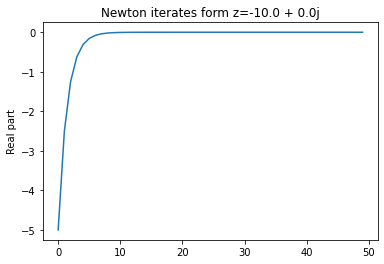

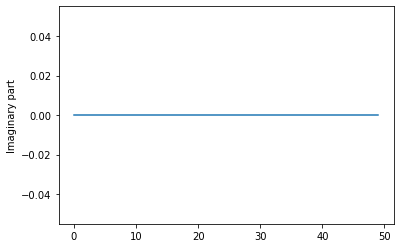

In [6]:
z=-10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

### Newton's iteration form $z=0.0 + 10.0j$

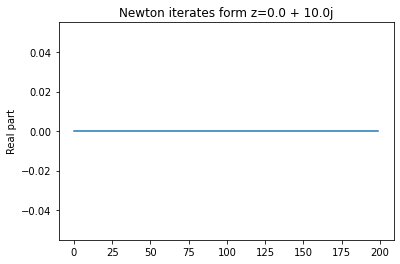

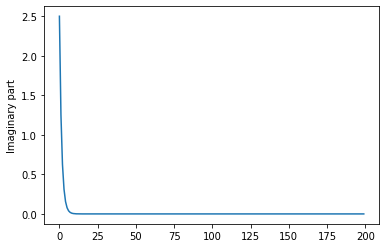

In [7]:
z=-0.0 + 5.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

### Newton's iteration form $z=0.0 - 10.0j$

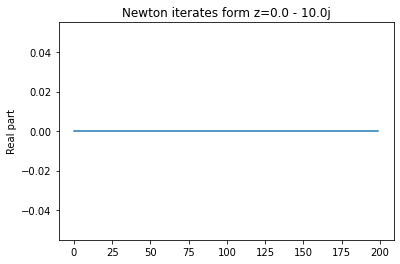

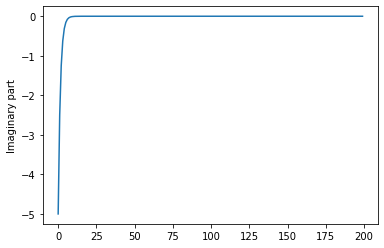

In [8]:
z=-0.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

### **5. Plot of the Newton's iterations for points on the diagonals in the four quadrants and 0.0 + 0.0j for the complex quadratic polynomial in 3. (Interpretation of the results at the end).**

### Newton's iteration form $z=10.0 + 10.0j$

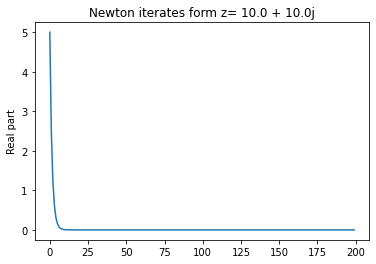

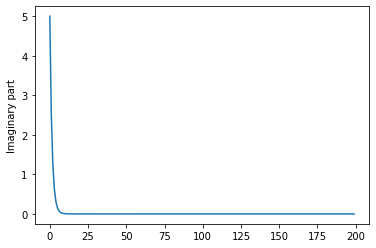

In [9]:
z=10.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z= 10.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

### Newton's iteration form $z=-10.0 + 10.0j$

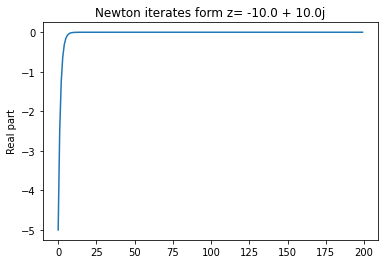

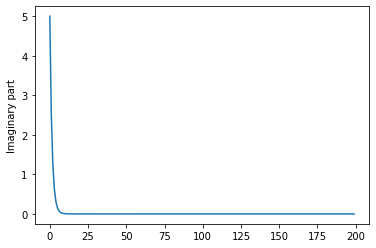

In [10]:
z=-10.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z= -10.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

### Newton's iteration form $z= -10.0 - 10.0j$

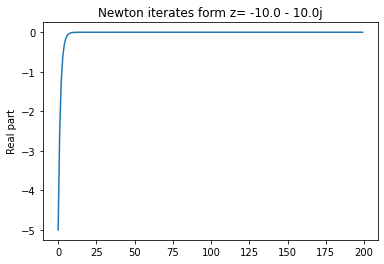

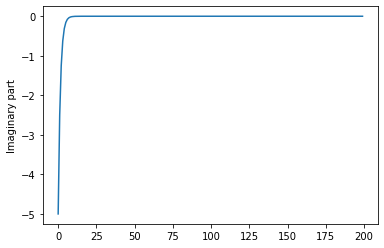

In [11]:
z=-10.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z= -10.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

### Newton's iteration form $z=10.0 - 10.0j$

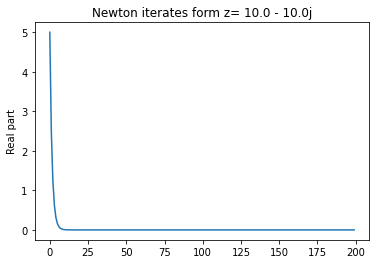

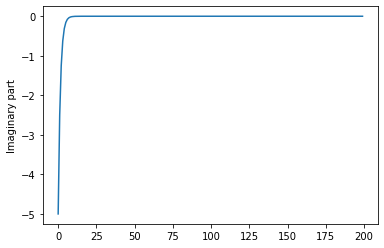

In [12]:
z=10.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z= 10.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

### Newton's iteration form $z=0.0 + 0.0j$

In [53]:
z=-0.0 + 0.0j
r=[]
i=[]
if dz == 0:
  print("Zero division. dz = 0.0")
elif dz == 0:
  for k in range(200):
    if dz == 0:
      print("Zero division. dz = 0.0")
      break
    dz = df(z)
    z = z - f(z) / dz # Newton iteration
    r.append(np.real(z))
    i.append(np.imag(z))
  plt.title('Newton iterates form z= 0.0 + 0.0j')
  plt.plot(r)
  plt.ylabel('Real part')
  plt.show()
  plt.plot(i)
  plt.ylabel('Imaginary part')
  plt.show()

Zero division. dz = 0.0


### **6. Interpretation of results**

Como se observa en la sección $4$ y $5$ (sobre *Newton's iterations*), la función converge a un sólo valor ($0$) de forma relativamente rápida. De igual forma, en la sección de *Newton fractals* se observa la presencia de un color. Cada color (en este caso sólo uno) representa una raíz a la cual converge el método de Newton, si se comienza desde ese punto inicial. Siguiendo la idea anterior, existiría convergencia de la funicón estudiada ($z^2$), y habría una única raíz.

Finalmente, el número de iteraciones necesarias para llegar a una raíz a la cual se converge, mediante el método de Newton comenzando desde un punto inicial, es directamente proporcional a la oscuridad del color. Para ilustrar lo anterior, imaginese un mapa físico (donde las alturas tienen colores): entonces a más iteraciones, más se tiene que bajar una colina.

## **$(x - 1)^2$ and $(z - 1)^2$**

In [14]:
import math
import matplotlib.pyplot as plt
import numpy as np

#--- FUNCTION
def f(z):
    return (z-1) ** 2

def df(z):
    return 2 * (z-1)
#--- 

def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256, m=1):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

#--- ROOTS
    # Bounding roots
    r1 = 1
    r2 = 1
#---

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - m*f(z) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                elif abs(z-r2)<=eps:
                    # color green
                    pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                else:   
                   pixels[height-y-1,x] = (0, 0, 0)
               
    return pixels

def display1(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256, m=1):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter, m=m)    
    #--- Function
    plt.title('Newton Fractal f(z)=(z-1)^2') 
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()


### **1. Plot the function in a x range that include the vertex and the roots (if there are roots).**

Text(0, 0.5, 'f(x)')

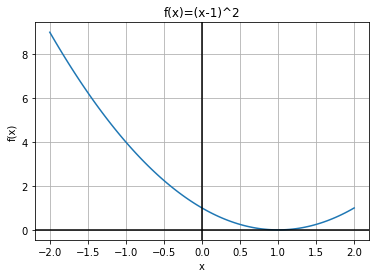

In [15]:
x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,f(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)=(x-1)^2') #--- Function
plt.xlabel('x')
plt.ylabel('f(x)')




### **2. Applying the Classic and Po Shen Loh ‘s methods for solving the quadratic equation.**

#### **Classic**
Solving:
$$(x - 1)^2 = 0$$
$$x^2 - 2x + 1 = 0$$

Aplying the quadratic formula we have

$$x = \frac{2 \pm \sqrt{4 - 4(1)(1)}}{2 (1)} = 1$$

$\square$

#### **Po Shen Loh's method**
Solving:

$$(x - 1)^2 = 0$$
$$x^2 - 2x + 1 = 0$$

IF we can find two numbers with
$$sum = 2$$
$$product = 1$$
THEN they are all the solutions.

A pair of $2/2$ will give a sum of $2$.
Need $u$: $1 - u$, $1 + u$ give product
$$1 - u^2 = 1$$
$$u = 0$$

The soultions are $(1 - u)$ and $(1 + u)$, so 

FINALLY $$x = 1$$
$\square$

### **3. Plot of the Newton fractals for the corresponding complex quadratic polynomial.**

zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


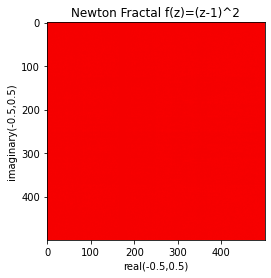

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


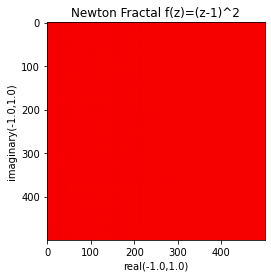

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


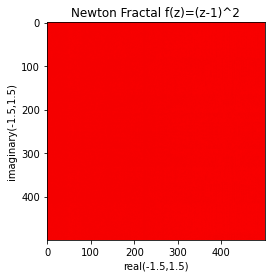

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


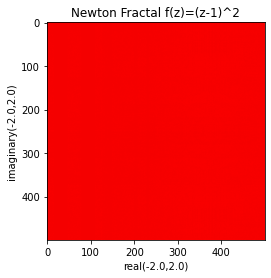

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


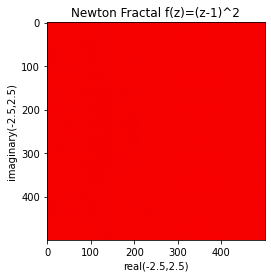

In [16]:
print("zoom out")
display1(zoom=1, m=2)
display1(zoom=2, m=2)
display1(zoom=3, m=2)
display1(zoom=4, m=2)
display1(zoom=5, m=2)

zoom in
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


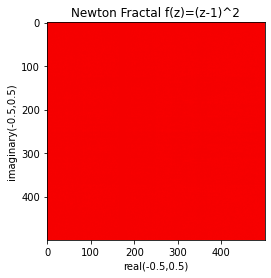

Z region from ( -0.25 , -0.25 ) to ( 0.25 , 0.25 )


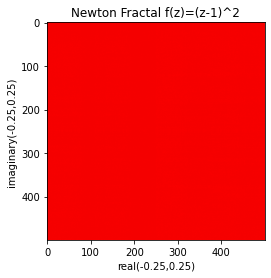

Z region from ( -0.16666666666666666 , -0.16666666666666666 ) to ( 0.16666666666666666 , 0.16666666666666666 )


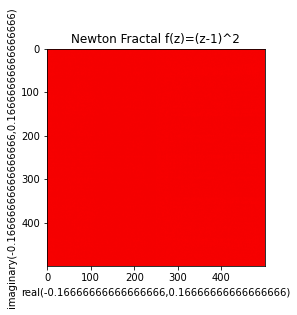

Z region from ( -0.125 , -0.125 ) to ( 0.125 , 0.125 )


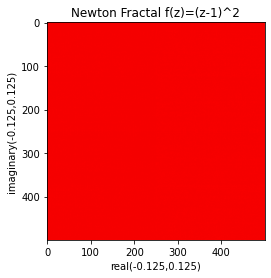

Z region from ( -0.1 , -0.1 ) to ( 0.1 , 0.1 )


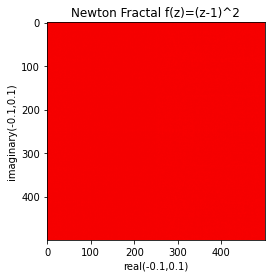

Z region from ( -0.05 , -0.05 ) to ( 0.05 , 0.05 )


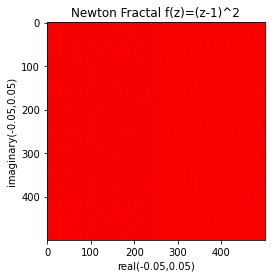

Z region from ( -0.005 , -0.005 ) to ( 0.005 , 0.005 )


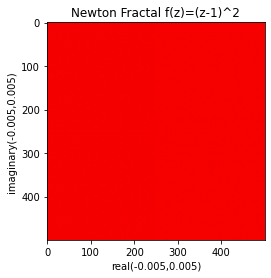

Z region from ( -0.0005 , -0.0005 ) to ( 0.0005 , 0.0005 )


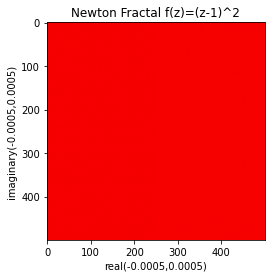

In [17]:
print("zoom in")
display1(zoom=1, m=2)
display1(zoom=1/2, m=2)
display1(zoom=1/3, m=2)
display1(zoom=1/4, m=2)
display1(zoom=1/5, m=2)
display1(zoom=1/10, m=2)
display1(zoom=1/100, m=2)
display1(zoom=1/1000, m=2)

### **4. Plot of the Newton's iterations for points on the positive and negative axes for the complex quadratic polynomial in 3. (Interpretation of the results at the end).**

### Newton's iteration form $z=10.0 + 0.0j$

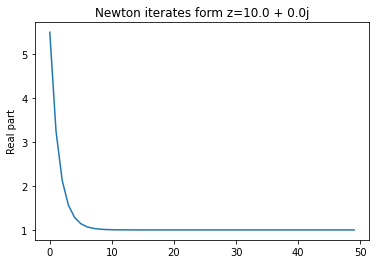

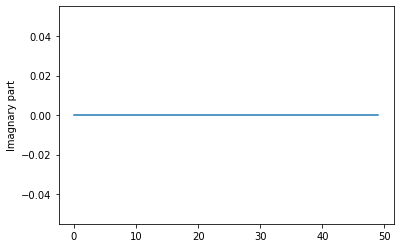

In [18]:
z=10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

### Newton's iteration form $z=-10.0 + 0.0j$

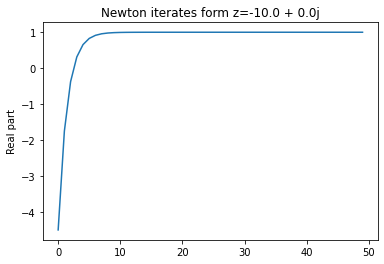

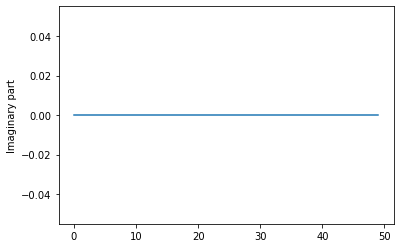

In [19]:
z=-10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

### Newton's iteration form $z=0.0 + 10.0j$

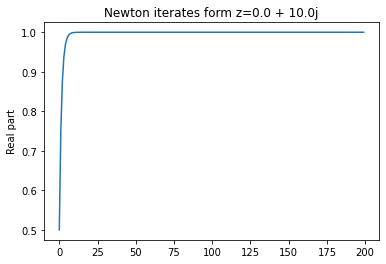

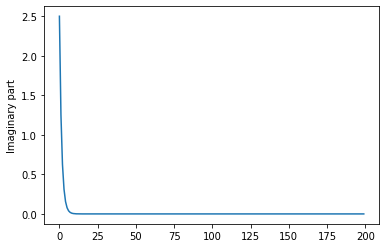

In [20]:
z=-0.0 + 5.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

### Newton's iteration form $z=0.0 - 10.0j$

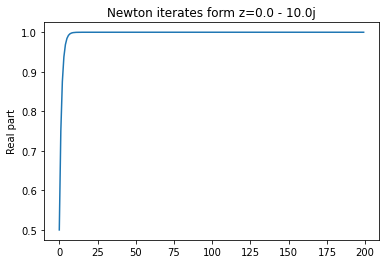

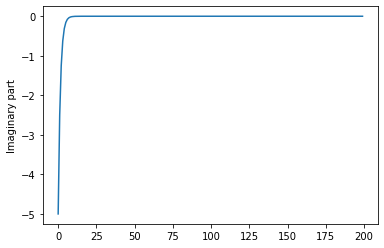

In [21]:
z=-0.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

### **5. Plot of the Newton's iterations for points on the diagonals in the four quadrants and 0.0 + 0.0j for the complex quadratic polynomial in 3. (Interpretation of the results at the end).**

### Newton's iteration form $z=10.0 + 10.0j$

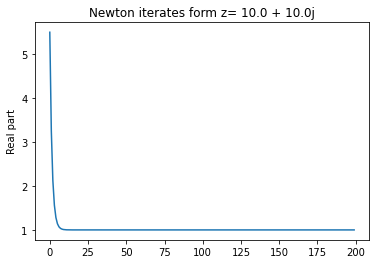

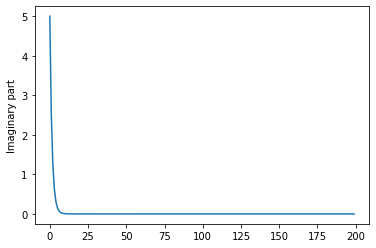

In [22]:
z=10.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z= 10.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

### Newton's iteration form $z=-10.0 + 10.0j$

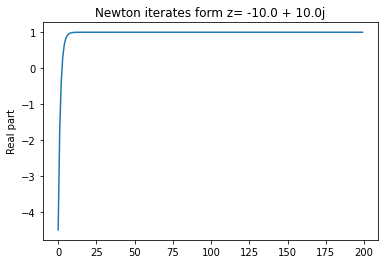

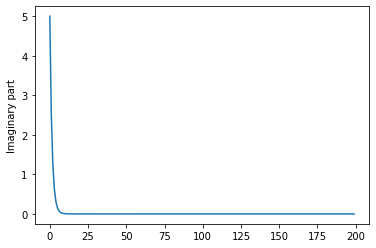

In [23]:
z=-10.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z= -10.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

### Newton's iteration form $z= -10.0 - 10.0j$

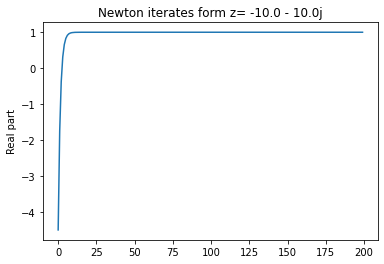

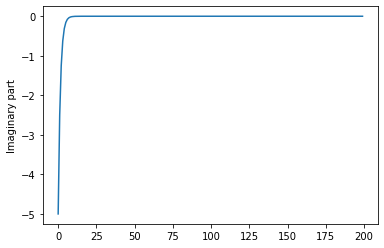

In [24]:
z=-10.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z= -10.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

### Newton's iteration form $z=10.0 - 10.0j$

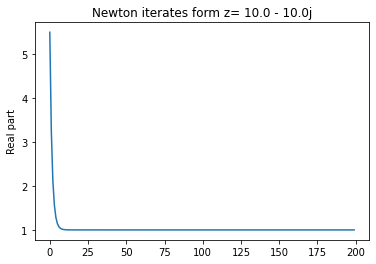

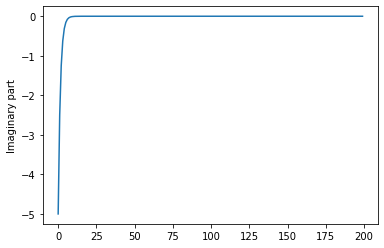

In [25]:
z=10.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z= 10.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

### Newton's iteration form $z=0.0 + 0.0j$

In [54]:
z=-0.0 + 0.0j
r=[]
i=[]
if dz == 0:
  print("Zero division. dz = 0.0")
elif dz == 0:
  for k in range(200):
    dz = df(z)
    if dz == 0:
      print("Zero division. dz = 0.0")      
      break
    z = z - f(z) / dz # Newton iteration
    r.append(np.real(z))
    i.append(np.imag(z))
  plt.title('Newton iterates form z= 0.0 + 0.0j')
  plt.plot(r)
  plt.ylabel('Real part')
  plt.show()
  plt.plot(i)
  plt.ylabel('Imaginary part')
  plt.show()

Zero division. dz = 0.0


### **6. Interpretation of results**

Se puede apreciar en la sección $4$ y $5$ (sobre *Newton's iterations*) que la función converge de forma relativamente rápida, teniendo una única raíz. Por otro lado, en la sección de *Newton fractals* se observa la presencia de sólo un color (rojo), que comprueba la existencia de una raíz (encontrada en la sección $2$), lo que implica la convergencia de la función estudiada ($(z-1)^2$).

Asimismo, cada color (en este caso sólo rojo, pues el polinomio posee única solución) representa una raíz a la cual converge el método de Newton, si se comienza desde ese punto inicial.

Finalmente, el número de iteraciones necesarias para llegar a una raíz a la cual se converge, mediante el método de Newton comenzando desde un punto inicial, es directamente proporcional a la oscuridad del color. Para ilustrar lo anterior, imaginese un mapa físico (donde las alturas tienen colores): entonces a más iteraciones, más se tiene que bajar una colina.

## **$x^2 – 1$ and $z^2 – 1$**

In [27]:
import math
import matplotlib.pyplot as plt
import numpy as np

#--- FUNCTION
def f(z):
    return z ** 2 -1

def df(z):
    return 2 * z
#--- 

def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

#--- ROOTS
    # Bounding roots
    r1 = 1
    r2 = -1
#---

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - f(z) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                elif abs(z-r2)<=eps:
                    # color green
                    pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                else:   
                   pixels[height-y-1,x] = (0, 0, 0)
               
    return pixels

def display1(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)    
    #--- Function
    plt.title('Newton Fractal f(z)=z^2-1') 
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()


### **1. Plot the function in a x range that include the vertex and the roots (if there are roots).**

Text(0, 0.5, 'f(x)')

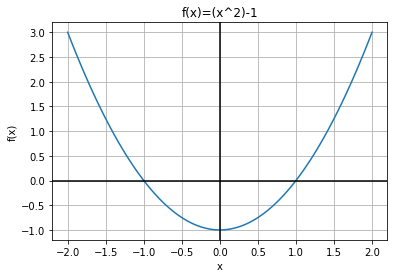

In [28]:
x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,f(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)=(x^2)-1') #--- Function
plt.xlabel('x')
plt.ylabel('f(x)')




### **2. Applying the Classic and Po Shen Loh ‘s methods for solving the quadratic equation.**

#### **Classic**
Solving:
$$x^2 + 0x - 1 = 0$$

Aplying the quadratic formula we have

$$x = \frac{-0 \pm \sqrt{0 - 4(1)(-1)}}{2 (1)} = \pm \frac{2}{2} = \pm 1$$

Or by factorization

$$x^2 - 1 = 0$$
$$(x + 1)(x - 1) = 0$$
$$x = \pm 1$$
$\square$

#### **Po Shen Loh's method**
Solving:

$$x^2 + 0x - 1 = 0$$

IF we can find two numbers with
$$sum = 0$$
$$product = -1$$
THEN they are all the solutions.

A pair of $0/2$ will give a sum of $0$.
Need $u$: $0 - u$, $0 + u$ give product
$$0 - u^2 = -1$$
$$u = \pm 1$$

FINALLY $$x = \pm 1$$
$\square$

### **3. Plot of the Newton fractals for the corresponding complex quadratic polynomial.**

zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


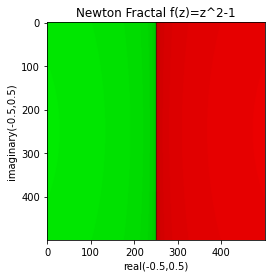

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


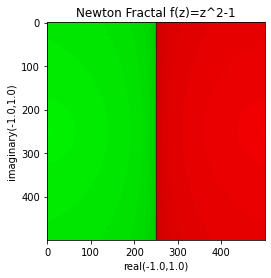

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


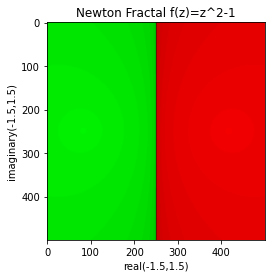

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


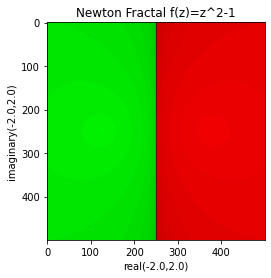

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


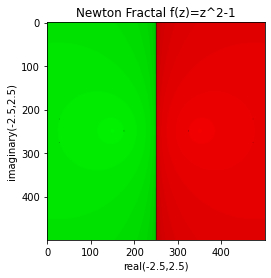

In [29]:
print("zoom out")
display1(zoom=1)
display1(zoom=2)
display1(zoom=3)
display1(zoom=4)
display1(zoom=5)

zoom in
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


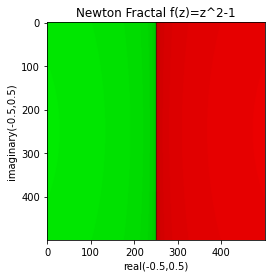

Z region from ( -0.25 , -0.25 ) to ( 0.25 , 0.25 )


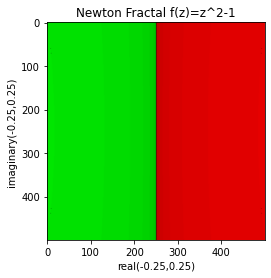

Z region from ( -0.16666666666666666 , -0.16666666666666666 ) to ( 0.16666666666666666 , 0.16666666666666666 )


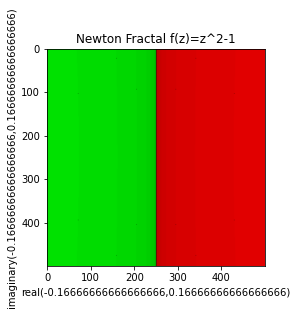

Z region from ( -0.125 , -0.125 ) to ( 0.125 , 0.125 )


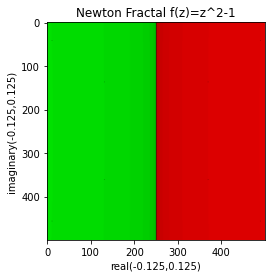

Z region from ( -0.1 , -0.1 ) to ( 0.1 , 0.1 )


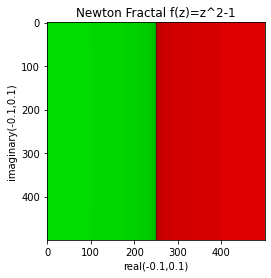

Z region from ( -0.05 , -0.05 ) to ( 0.05 , 0.05 )


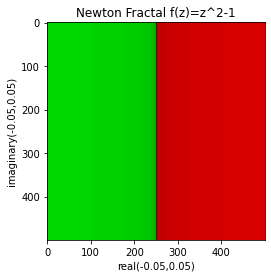

Z region from ( -0.005 , -0.005 ) to ( 0.005 , 0.005 )


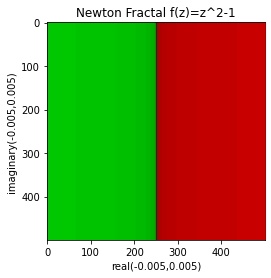

Z region from ( -0.0005 , -0.0005 ) to ( 0.0005 , 0.0005 )


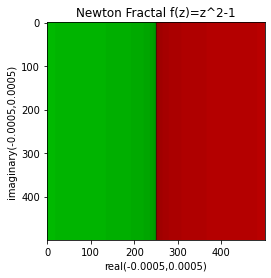

In [30]:
print("zoom in")
display1(zoom=1)
display1(zoom=1/2)
display1(zoom=1/3)
display1(zoom=1/4)
display1(zoom=1/5)
display1(zoom=1/10)
display1(zoom=1/100)
display1(zoom=1/1000)

### **4. Plot of the Newton's iterations for points on the positive and negative axes for the complex quadratic polynomial in 3. (Interpretation of the results at the end).**

### Newton's iteration form $z=10.0 + 0.0j$

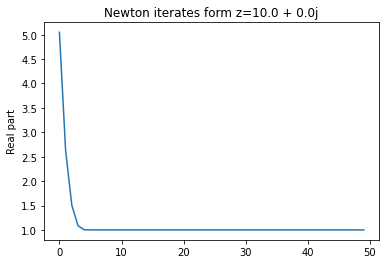

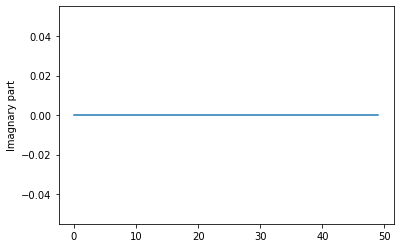

In [31]:
z=10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

### Newton's iteration form $z=-10.0 + 0.0j$

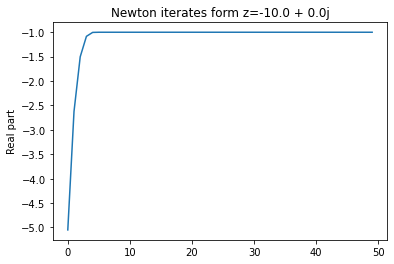

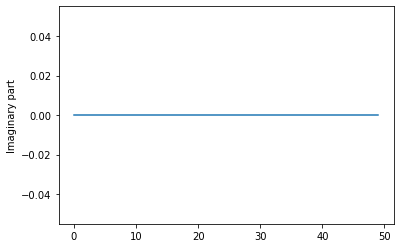

In [32]:
z=-10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

### Newton's iteration form $z=0.0 + 10.0j$

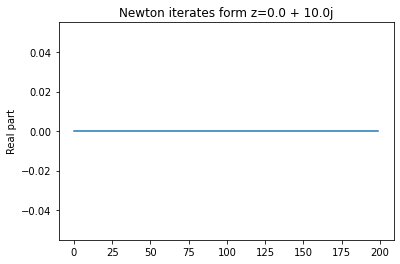

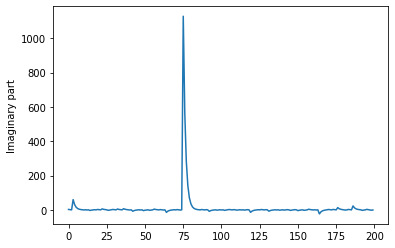

In [33]:
z=-0.0 + 5.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

### Newton's iteration form $z=0.0 - 10.0j$

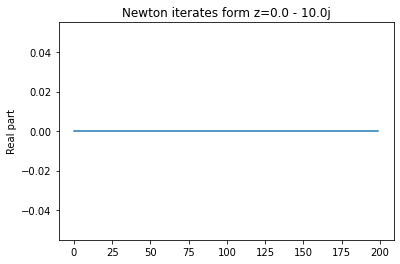

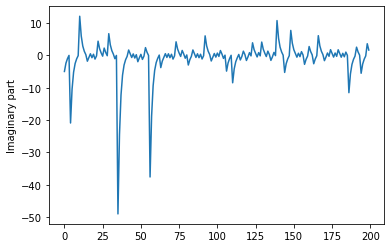

In [34]:
z=-0.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

### **5. Plot of the Newton's iterations for points on the diagonals in the four quadrants and 0.0 + 0.0j for the complex quadratic polynomial in 3. (Interpretation of the results at the end).**

### Newton's iteration form $z=10.0 + 10.0j$

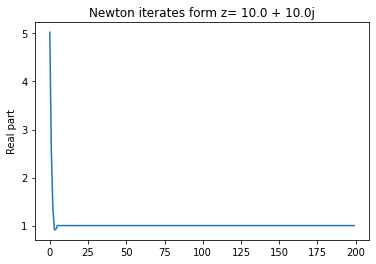

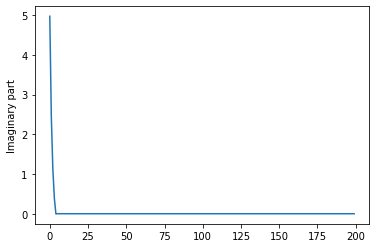

In [35]:
z=10.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z= 10.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

### Newton's iteration form $z=-10.0 + 10.0j$

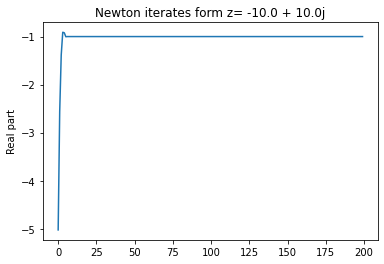

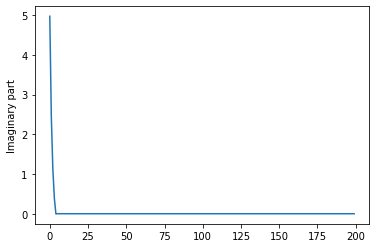

In [36]:
z=-10.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z= -10.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

### Newton's iteration form $z= -10.0 - 10.0j$

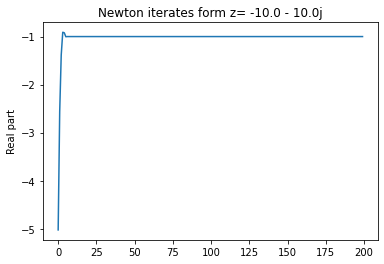

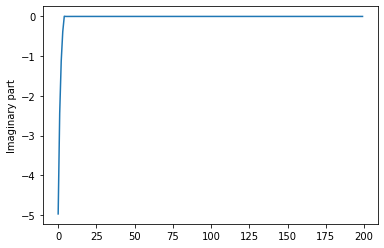

In [37]:
z=-10.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z= -10.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

### Newton's iteration form $z=10.0 - 10.0j$

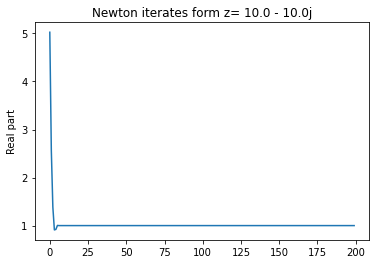

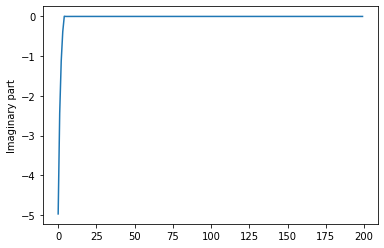

In [38]:
z=10.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z= 10.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

### Newton's iteration form $z=0.0 + 0.0j$

In [55]:
z=-0.0 + 0.0j
r=[]
i=[]
if dz == 0:
  print("Zero division. dz = 0.")
elif dz == 0:
  for k in range(200):
    dz = df(z)
    if dz == 0:
      print("Zero division. dz = 0.0")      
      break
    z = z - f(z) / dz # Newton iteration
    r.append(np.real(z))
    i.append(np.imag(z))
  plt.title('Newton iterates form z= 0.0 + 0.0j')
  plt.plot(r)
  plt.ylabel('Real part')
  plt.show()
  plt.plot(i)
  plt.ylabel('Imaginary part')
  plt.show()

Zero division. dz = 0.


### **6. Interpretation of results**

Como se observa en la sección $4$ y $5$ (sobre *Newton's iterations*), la función converge en los reales a los valores $1$ y $-1$ de forma relativamente rápida. Por otra parte, hay *plots* donde oscila, y una posible razón es por la escongencia de los puntos iniciales para proceder con las iteraciones; o bien diverge en los números complejos, y por tanto no poseería raíz imaginaria. Asimismo, en la sección de *Newton fractals* se observa la presencia de dos colores, lo que implica la convergencia de la función estudiada ($z^2 - 1$), pues cada color representa una raíz a la cual converge el método de Newton, si se comienza desde ese punto inicial.

Finalmente, el número de iteraciones necesarias para llegar a una raíz a la cual se converge, mediante el método de Newton comenzando desde un punto inicial, es directamente proporcional a la oscuridad del color. Para ilustrar lo anterior, imaginese un mapa físico (donde las alturas tienen colores): entonces a más iteraciones, más se tiene que bajar una colina.

## **$x^2 + 1$ and $z^2 + 1$**

In [40]:
import math
import matplotlib.pyplot as plt
import numpy as np

#--- FUNCTION
def f(z):
    return z ** 2 +1

def df(z):
    return 2 * z
#--- 

def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

#--- ROOTS
    # Bounding roots
    r1 = complex(0.0, 1.0)
    r2 = complex(0.0, -1.0)
#---

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - f(z) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                elif abs(z-r2)<=eps:
                    # color green
                    pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                else:   
                   pixels[height-y-1,x] = (0, 0, 0)
               
    return pixels

def display1(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)    
    #--- Function
    plt.title('Newton Fractal f(z)=z^2+1') 
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()


### **1. Plot the function in a x range that include the vertex and the roots (if there are roots).**

Text(0, 0.5, 'f(x)')

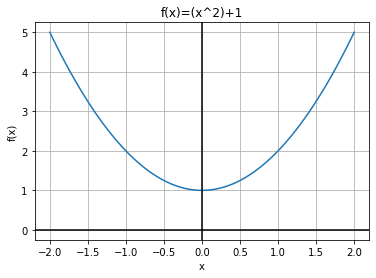

In [41]:
x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,f(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)=(x^2)+1') #--- Function
plt.xlabel('x')
plt.ylabel('f(x)')




### **2. Applying the Classic and Po Shen Loh ‘s methods for solving the quadratic equation.**

#### **Classic**
Solving:
$$x^2 + 0x + 1 = 0$$

Aplying the quadratic formula we have

$$x = \frac{-0 \pm \sqrt{0 - 4(1)(1)}}{2 (1)} = \pm \frac{2 \sqrt{-1}}{2} = \pm i$$
$\square$

#### **Po Shen Loh's method**
Solving:

$$x^2 + 0x + 1 = 0$$

IF we can find two numbers with
$$sum = 0$$
$$product = 1$$
THEN they are all the solutions.

A pair of $0/2$ will give a sum of $0$.
Need $u$: $0 - u$, $0 + u$ give product
$$0 - u^2 = 1$$
$$u = \pm \sqrt{-1}$$
$$u = \pm i$$

FINALLY $$x = \pm i$$
$\square$

### **3. Plot of the Newton fractals for the corresponding complex quadratic polynomial.**

zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


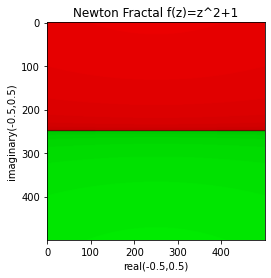

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


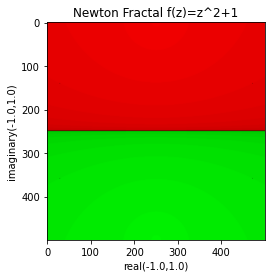

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


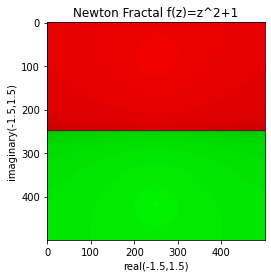

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


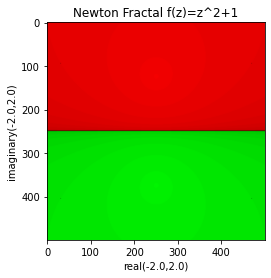

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


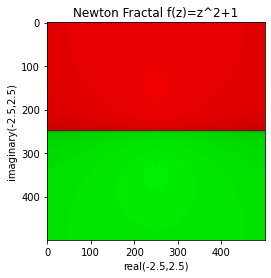

In [42]:
print("zoom out")
display1(zoom=1)
display1(zoom=2)
display1(zoom=3)
display1(zoom=4)
display1(zoom=5)

zoom in
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


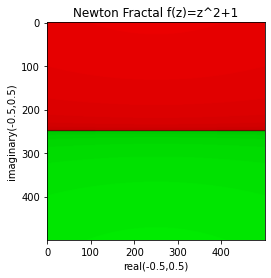

Z region from ( -0.25 , -0.25 ) to ( 0.25 , 0.25 )


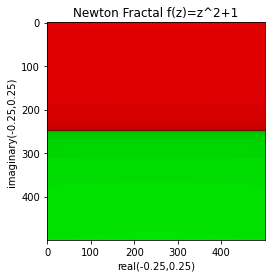

Z region from ( -0.16666666666666666 , -0.16666666666666666 ) to ( 0.16666666666666666 , 0.16666666666666666 )


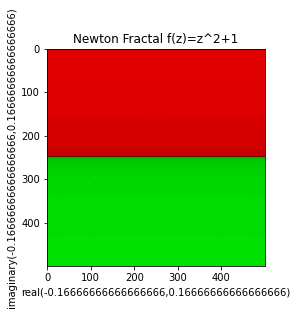

Z region from ( -0.125 , -0.125 ) to ( 0.125 , 0.125 )


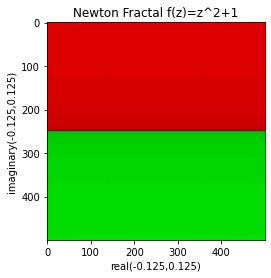

Z region from ( -0.1 , -0.1 ) to ( 0.1 , 0.1 )


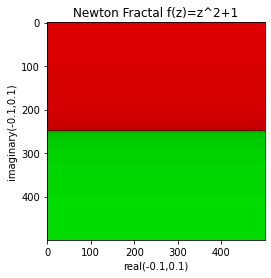

Z region from ( -0.05 , -0.05 ) to ( 0.05 , 0.05 )


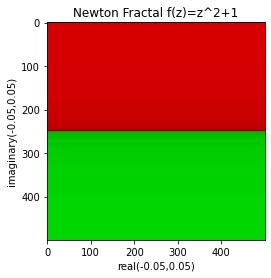

Z region from ( -0.005 , -0.005 ) to ( 0.005 , 0.005 )


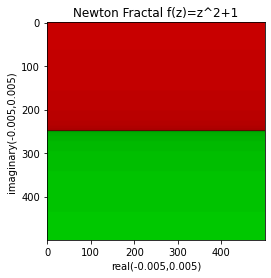

Z region from ( -0.0005 , -0.0005 ) to ( 0.0005 , 0.0005 )


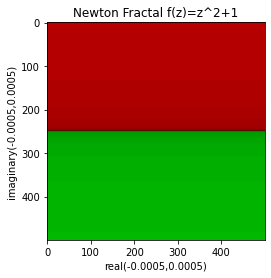

In [43]:
print("zoom in")
display1(zoom=1)
display1(zoom=1/2)
display1(zoom=1/3)
display1(zoom=1/4)
display1(zoom=1/5)
display1(zoom=1/10)
display1(zoom=1/100)
display1(zoom=1/1000)

### **4. Plot of the Newton's iterations for points on the positive and negative axes for the complex quadratic polynomial in 3. (Interpretation of the results at the end).**

### Newton's iteration form $z=10.0 + 0.0j$

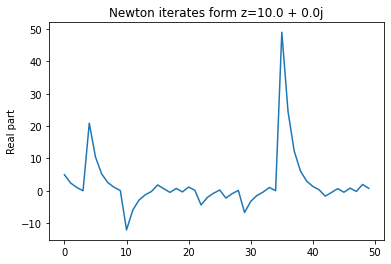

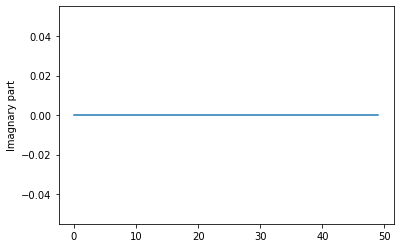

In [44]:
z=10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

### Newton's iteration form $z=-10.0 + 0.0j$

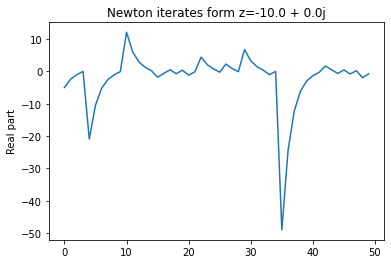

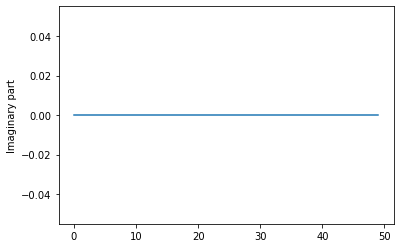

In [45]:
z=-10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

### Newton's iteration form $z=0.0 + 10.0j$

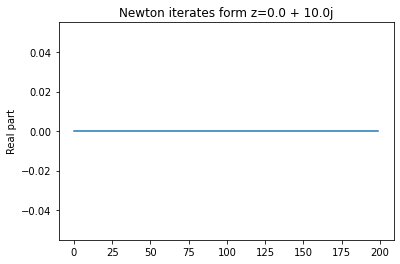

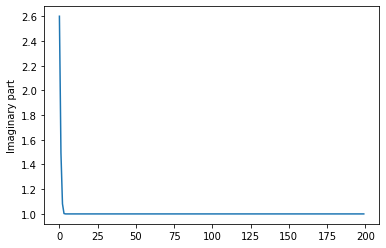

In [46]:
z=-0.0 + 5.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

### Newton's iteration form $z=0.0 - 10.0j$

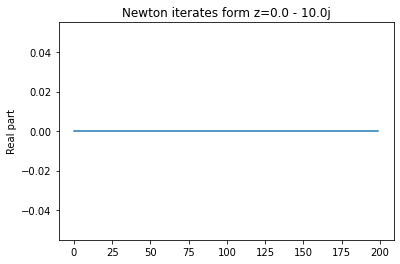

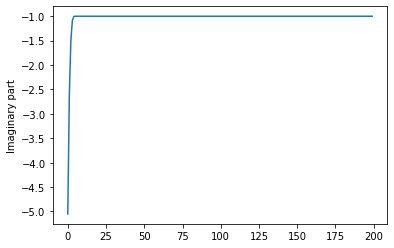

In [47]:
z=-0.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

### **5. Plot of the Newton's iterations for points on the diagonals in the four quadrants and 0.0 + 0.0j for the complex quadratic polynomial in 3. (Interpretation of the results at the end).**

### Newton's iteration form $z=10.0 + 10.0j$

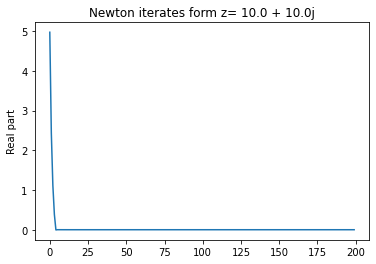

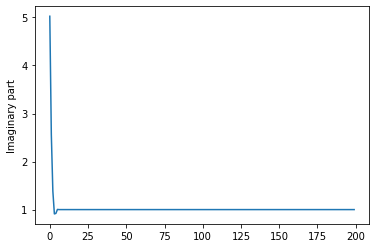

In [48]:
z=10.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z= 10.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

### Newton's iteration form $z=-10.0 + 10.0j$

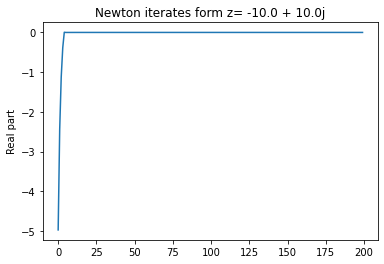

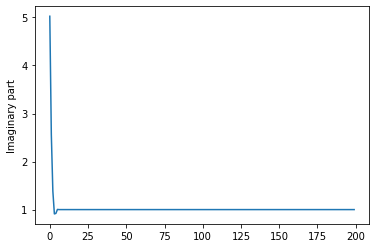

In [49]:
z=-10.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z= -10.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

### Newton's iteration form $z= -10.0 - 10.0j$

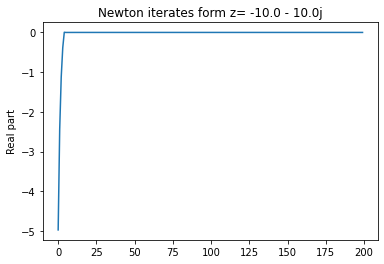

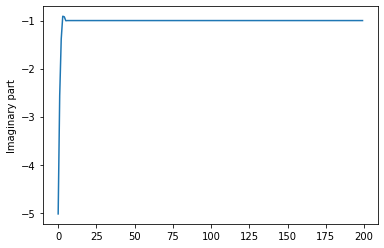

In [50]:
z=-10.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z= -10.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

### Newton's iteration form $z=10.0 - 10.0j$

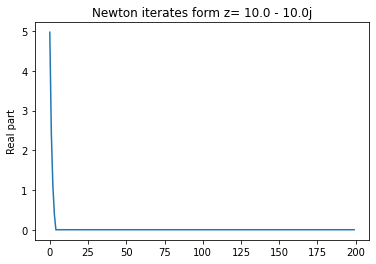

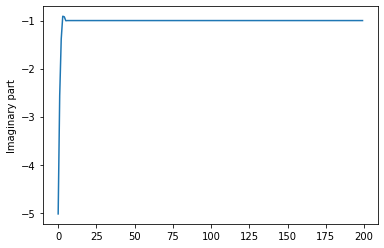

In [51]:
z=10.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z= 10.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

### Newton's iteration form $z=0.0 + 0.0j$

In [56]:
z=-0.0 + 0.0j
r=[]
i=[]
if dz == 0:
  print("Zero division. dz = 0.")
elif dz != 0:
  for k in range(200):
    dz = df(z)
    if dz == 0:
      print("Zero division. dz = 0.0")      
      break
    z = z - f(z) / dz # Newton iteration
    r.append(np.real(z))
    i.append(np.imag(z))
  plt.title('Newton iterates form z= 0.0 + 0.0j')
  plt.plot(r)
  plt.ylabel('Real part')
  plt.show()
  plt.plot(i)
  plt.ylabel('Imaginary part')
  plt.show()

Zero division. dz = 0.


### **6. Interpretation of results**

Como se observa en la sección $4$ y $5$ (sobre *Newton's iterations*), la función converge en los números complejos a los valores $i$ y $-i$ de forma relativamente rápida. Por otra parte, hay *plots* donde oscila, y una posible razón es por la escongencia de los puntos iniciales para proceder con las iteraciones; o bien diverge en los números reales, y por tanto no poseería raíz real. Asimismo, en la sección de *Newton fractals* se observa la presencia de dos colores, y esto implicaría la convergencia de la función estudiada ($z^2 + 1$), puesto que cada color representa una raíz a la cual converge el método de Newton, si se comienza desde ese punto inicial.

Finalmente, el número de iteraciones necesarias para llegar a una raíz a la cual se converge, mediante el método de Newton comenzando desde un punto inicial, es directamente proporcional a la oscuridad del color. Para ilustrar lo anterior, imaginese un mapa físico (donde las alturas tienen colores): entonces a más iteraciones, más se tiene que bajar una colina.